## Generate a first order AR model 

Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Let's assume a mean-zero white noise with a standard deviation of 2. We'll also create a daily datetime index ranging from January 2017 until the end of March 2018.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(11225)

# Create a series with the specified dates
dates = pd.date_range('2017-01-01', '2018-03-31')

In [3]:
# We will generate a first order AR model with  𝜙=0.7  ,  𝜇=5  , and  𝑌0=8 .

In [4]:
error = np.random.normal(0, 2, len(dates))
Y_0 = 8
mu = 5
phi = 0.7

In [5]:
TS = [None] * len(dates)
y = Y_0
for i, row in enumerate(dates):
    TS[i] = mu + y * phi + error[i]
    y = TS[i] - mu

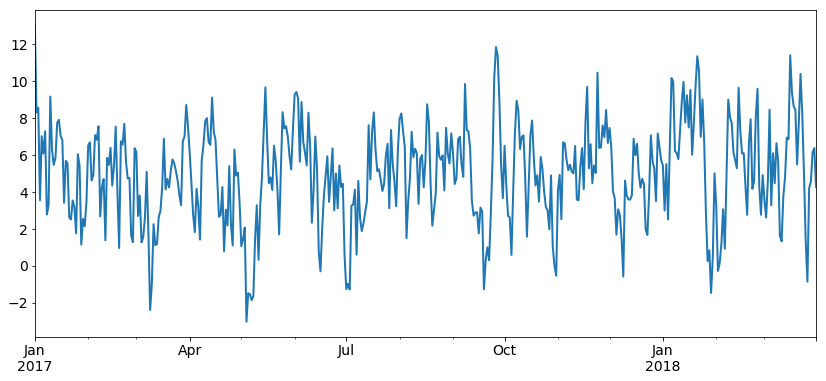

In [6]:
series = pd.Series(TS, index=dates)

series.plot(figsize=(14,6), linewidth=2, fontsize=14);

In [27]:
series.head()

2017-01-01    13.008794
2017-01-02     8.290869
2017-01-03     8.544932
2017-01-04     3.538470
2017-01-05     7.004262
Freq: D, dtype: float64

### Look at the ACF and PACF of the model
 

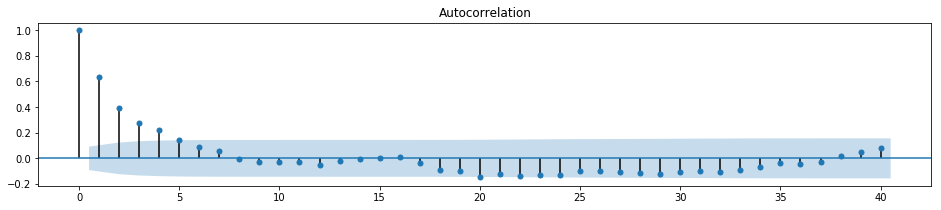

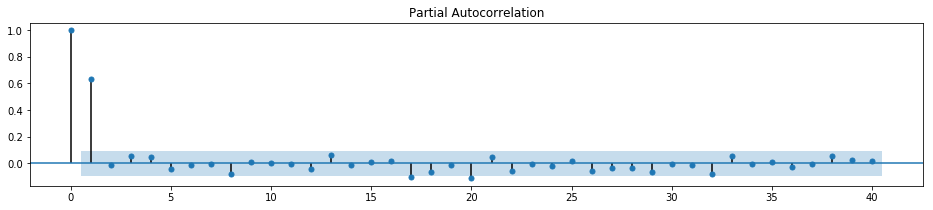

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(series, ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(series, ax=ax, lags=40);

statsmodels also has a tool that fits ARMA models to time series. The only thing we have to do is provide the number of orders for AR and MA. Have a look at the code below, and the output of the code.

The ARMA() function requires two arguments: the first is the time series to which the model is fit, and the second is the order in the form (p,q) -- where p refers to the order of AR and q refers to the order of MA. For example, a first order AR model would be represented as (1,0).

In [12]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(series, order=(1,0))

In [13]:
# Once you have instantiated the AR(1) model, you can call the .fit() method to the fit the model to the data.

In [14]:
# Fit the model to data
res_arma = mod_arma.fit()

In [15]:
# Similar to other models, you can then call the .summary() method to print the information of the model.

# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood                -968.698
Method:                       css-mle   S.D. of innovations              2.033
Date:                Sat, 27 Feb 2021   AIC                           1943.395
Time:                        18:58:42   BIC                           1955.756
Sample:                    01-01-2017   HQIC                          1948.265
                         - 03-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9664      0.269     18.444      0.000       4.439       5.494
ar.L1.y        0.6474      0.036     17.880      0.000       0.576       0.718
                                    Roots           

 Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect. You can use the `.params` attribute to check these values. 

In [16]:
# Print out the estimate for the constant and for theta
print(res_arma.params)

const      4.966376
ar.L1.y    0.647429
dtype: float64


# ARMA Models in statsmodels Lab

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)

In [32]:
data.index

DatetimeIndex(['1900-01-01', '1904-01-01', '1908-01-01', '1912-01-01',
               '1920-01-01', '1924-01-01', '1928-01-01', '1932-01-01',
               '1936-01-01', '1948-01-01', '1952-01-01', '1956-01-01',
               '1960-01-01', '1964-01-01', '1968-01-01', '1972-01-01',
               '1976-01-01', '1980-01-01', '1984-01-01', '1988-01-01',
               '1992-01-01', '1996-01-01'],
              dtype='datetime64[ns]', name='year', freq=None)

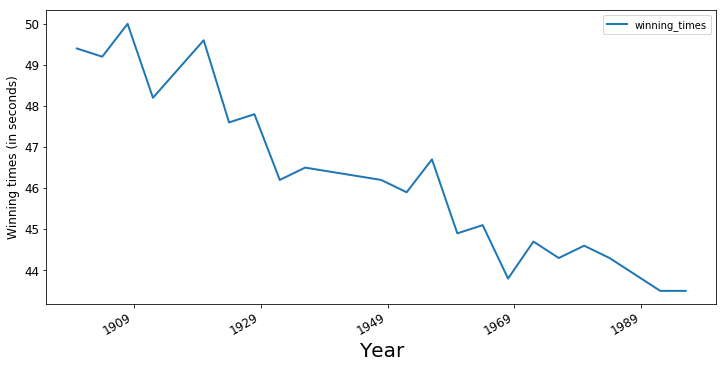

In [34]:
# Plot the time series
data.plot(figsize=(12,6), linewidth=2, fontsize=12)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Winning times (in seconds)', fontsize=12);

In [35]:
data_diff = data.diff().dropna()

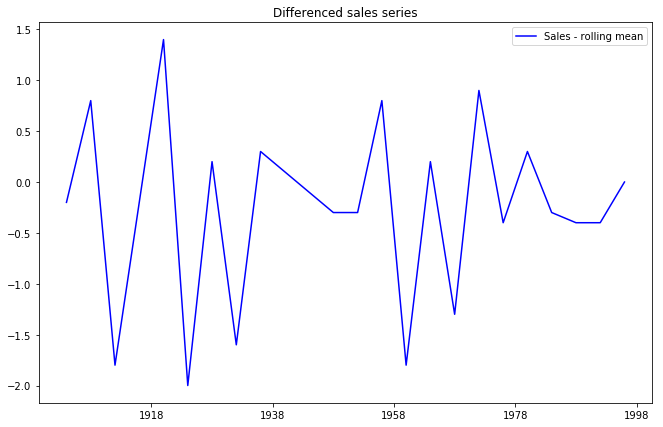

In [37]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)

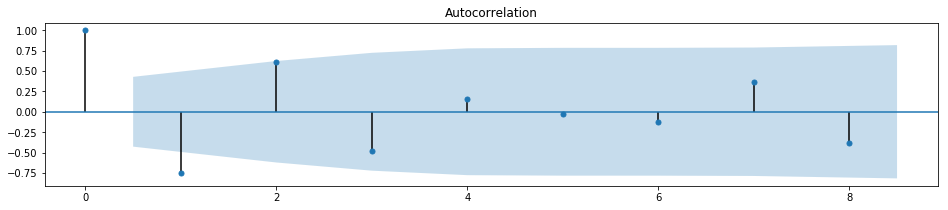

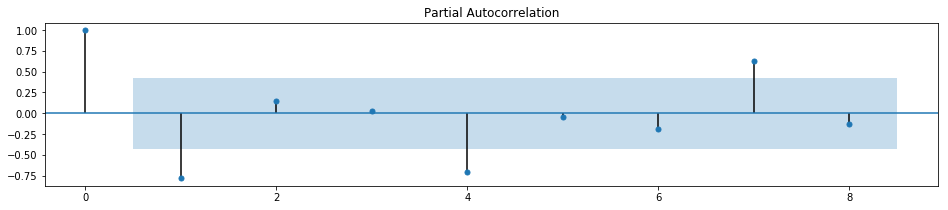

In [43]:
# Use statsmodels to plot the ACF and PACF of this differenced time series.

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(data_diff, ax=ax, lags=8);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(data_diff, ax=ax, lags=8);

In [39]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA

# Fit an ARMA(1,0) model
mod_arma = ARMA(data_diff, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Sun, 28 Feb 2021   AIC                             46.107
Time:                        10:49:29   BIC                             49.241
Sample:                             0   HQIC                            46.787
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.000      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                

/Users/ivan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [40]:
# Fit an ARMA(2,1) model
mod_arma = ARMA(data_diff, order=(2,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

/Users/ivan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 1)   Log Likelihood                 -18.955
Method:                       css-mle   S.D. of innovations              0.562
Date:                Sun, 28 Feb 2021   AIC                             47.911
Time:                        10:50:30   BIC                             53.133
Sample:                             0   HQIC                            49.044
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2916      0.073     -4.018      0.000      -0.434      -0.149
ar.L1.winning_times    -1.6827      0.119    -14.199      0.000      -1.915      -1.450
ar.L2.winning_ti

In [41]:
# Fit an ARMA(2,2) model
mod_arma = ARMA(data_diff, order=(2,2))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

/Users/ivan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 2)   Log Likelihood                 -16.472
Method:                       css-mle   S.D. of innovations              0.461
Date:                Sun, 28 Feb 2021   AIC                             44.943
Time:                        10:50:57   BIC                             51.210
Sample:                             0   HQIC                            46.303
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2718      0.098     -2.779      0.005      -0.463      -0.080
ar.L1.winning_times    -1.7575      0.097    -18.070      0.000      -1.948      -1.567
ar.L2.winning_ti

/Users/ivan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [42]:
"""
ARMA(1,0), ARMA(2,2) and ARMA(2,1) all seem to have decent fits with significant parameters. 
Depending on whether you pick AIC or BIC as a model selection criterion, 
your result may vary. In this situation, you'd generally go for a model with fewer parameters, 
so ARMA(1,0) seems fine. Note that we have a relatively short time series, 
which can lead to a more difficult model selection process.
"""

"\nARMA(1,0), ARMA(2,2) and ARMA(2,1) all seem to have decent fits with significant parameters. \nDepending on whether you pick AIC or BIC as a model selection criterion, \nyour result may vary. In this situation, you'd generally go for a model with fewer parameters, \nso ARMA(1,0) seems fine. Note that we have a relatively short time series, \nwhich can lead to a more difficult model selection process.\n"